In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

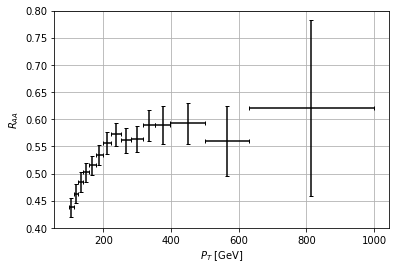

In [64]:
'''
Organize data from 10.17182/hepdata.84819.v1/t19, E_cm = 5020 GeV
to a csv file with 4 columns: RAA_pT, RAA_pTbins, RAA_y, RAA_yerr
'''

e_cm = 5020 #GeV
path_to_file = f'RAA_{e_cm}_raw.csv'
data = pd.read_csv(path_to_file, skiprows=13)
RAA_pT = data.values[:,0]
RAA_y = data.values[:,3]
RAA_pTbins = (data.values[:,2] - data.values[:,1])/2
RAA_y_err = np.zeros_like(RAA_y)
for i in [4, 6, 8, 10]:
    RAA_y_err += data.values[:,i]**2
RAA_y_err = np.sqrt(RAA_y_err)

#Save data
data_dict = {'RAA_pT': RAA_pT, 'RAA_pTbins': RAA_pTbins,
             'RAA_y' : RAA_y , 'RAA_y_err' : RAA_y_err}
dataFrame = pd.DataFrame(data_dict)
dataFrame.to_csv(f'RAA_{e_cm}.csv', sep='\t')

#Show the data
plt.figure()
plt.errorbar(x=RAA_pT, y=RAA_y, xerr=RAA_pTbins, yerr=RAA_y_err,
            capsize=2, fmt='.',markersize=0.1, color='black')
plt.ylabel('$R_{AA}$')
plt.xlabel('$P_T$ [GeV]')
plt.ylim(0.4,0.8)
plt.grid()
plt.show()


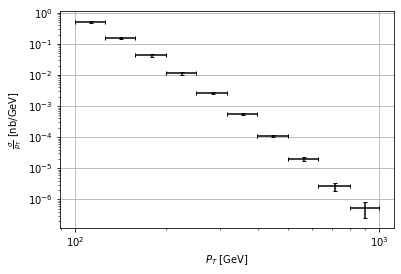

In [2]:
'''
Same as the one above but for cross section for PbPb->Jets
'''
e_cm = 5020 #GeV
path_to_file = f'PbPb_{e_cm}_raw.csv'
data = pd.read_csv(path_to_file, skiprows=13)
PbPb_pT = data.values[:,0]
PbPb_y = data.values[:,3]
PbPb_pTbins = (data.values[:,2] - data.values[:,1])/2
PbPb_y_err = np.zeros_like(PbPb_pT)
for i in [4, 6]:
    PbPb_y_err += data.values[:,i]**2
PbPb_y_err = np.sqrt(PbPb_y_err)

#Save data
data_dict = {'PbPb_pT': PbPb_pT, 'PbPb_pTbins': PbPb_pTbins,
             'PbPb_y' : PbPb_y , 'PbPb_y_err' : PbPb_y_err}
dataFrame = pd.DataFrame(data_dict)
dataFrame.to_csv(f'PbPb_{e_cm}.csv', sep='\t')

#Show the data
plt.figure()
plt.errorbar(x=PbPb_pT, y=PbPb_y, xerr=PbPb_pTbins, yerr=PbPb_y_err,
            capsize=2, fmt='.',markersize=0.1, color='black')
plt.ylabel(r'$\frac{\sigma}{p_T}$ [nb/GeV]')
plt.xlabel('$P_T$ [GeV]')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

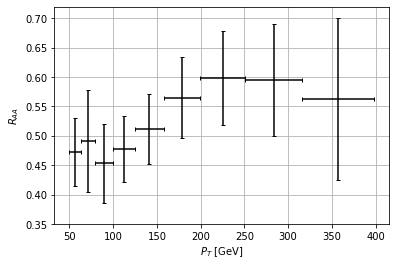

In [65]:
'''
Organize data from 110.17182/hepdata.66021.v1/t27, E_cm = 2760 GeV
to a csv file with 4 columns: RAA_pT, RAA_pTbins, RAA_y, RAA_yerr
'''

e_cm = 2760 #GeV
path_to_file = f'RAA_{e_cm}_raw.csv'
data = pd.read_csv(path_to_file, skiprows=13)
RAA_pT = data.values[:,0]
RAA_y = data.values[:,3]
RAA_pTbins = (data.values[:,2] - data.values[:,1])/2
RAA_y_err = np.zeros_like(RAA_y)
for i in [4, 6, 8, 10, 10]:
    RAA_y_err += (data.values[:,i].astype(np.float)/100*RAA_y)**2
RAA_y_err = np.sqrt(np.array(RAA_y_err))

#Save data
data_dict = {'RAA_pT': RAA_pT, 'RAA_pTbins': RAA_pTbins,
             'RAA_y' : RAA_y , 'RAA_y_err' : RAA_y_err}
dataFrame = pd.DataFrame(data_dict)
dataFrame.to_csv(f'RAA_{e_cm}.csv', sep='\t')


#Show the data
plt.figure()
plt.errorbar(x=RAA_pT, y=RAA_y, xerr=RAA_pTbins, yerr=RAA_y_err,
            capsize=2, fmt='.',markersize=0.1, color='black')
plt.ylabel('$R_{AA}$')
plt.xlabel('$P_T$ [GeV]')
plt.ylim(0.35,0.72)
plt.grid()
plt.show()


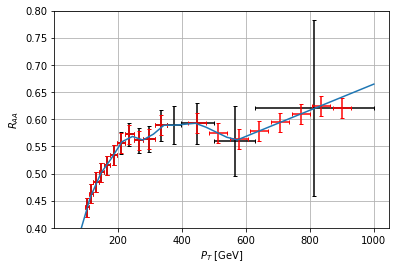

In [88]:
#Make mock data
data = pd.read_csv('RAA_5020.csv', sep='\t')
RAA_x = data.values[:,1]
RAA_y = data.values[:,3]
RAA_x_err = data.values[:,2]
RAA_y_err = data.values[:,4]

from scipy.interpolate import interp1d
fit = interp1d(RAA_x, RAA_y, fill_value='extrapolate')
new_pT = np.linspace(50, 1000, 30)
new_x = np.linspace(RAA_x[12], 900, 8)
new_dx = (new_x[-1]-new_x[0])/16
new_y = fit(new_x)
new_err = np.array([RAA_y_err[5] for i in range(14)])
new_xerr = np.array([new_dx for i in range(8)])
mock_x = np.concatenate((RAA_x[0:11], new_x), axis=None) 
mock_err = np.concatenate((RAA_y_err[0:5], new_err), axis=None)
mock_xerr = np.concatenate((RAA_x_err[0:11], new_xerr), axis=None)
mock_y = np.concatenate((RAA_y[0:11], new_y), axis=None)
mock_y[-1] = RAA_y[-1]

plt.figure()
plt.errorbar(x=RAA_x, y=RAA_y, xerr=RAA_x_err , yerr=RAA_y_err,
            capsize=2, fmt='.',markersize=0.1, color='black')
plt.errorbar(x=mock_x, y=mock_y, xerr=mock_xerr , yerr=mock_err,
            capsize=2, fmt='.',markersize=0.1, color='red')
plt.plot(new_pT, fit(new_pT))
plt.ylabel('$R_{AA}$')
plt.xlabel('$P_T$ [GeV]')
plt.ylim(0.4,0.8)
plt.grid()
plt.show()

#Save data
data_dict = {'RAA_pT': mock_x, 'RAA_pTbins': mock_xerr,
             'RAA_y' : mock_y ,'RAA_y_err' : mock_err}
dataFrame = pd.DataFrame(data_dict)
dataFrame.to_csv(f'RAA_mock.csv', sep='\t')
